In [122]:
from transformers import pipeline
from models import get_activation
from matplotlib import pyplot as plt
import cv2

In [128]:
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning", device=0)

Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.11.crossattention.masked_bias', 'decoder.transformer.h.7.attn.bias', 'decoder.transformer.h.8.crossattention.bias', 'decoder.transformer.h.5.attn.bias', 'decoder.transformer.h.1.attn.bias', 'decoder.transformer.h.6.crossattention.bias', 'decoder.transformer.h.6.crossattention.masked_bias', 'decoder.transformer.h.2.crossattention.bias', 'decoder.transformer.h.11.attn.bias', 'decoder.transformer.h.6.attn.masked_bias', 'decoder.transformer.h.7.crossattention.bias', 'decoder.transformer.h.4.crossattention.masked_bias', 'decoder.transformer.h.3.attn.bias', 'decoder.transformer.h.10.attn.masked_bias', 'decoder.transformer.h.8.crossattention.masked_bias', 'decoder.transformer.h.5.crossattention.bias', 'decoder.transformer.h.3.attn.masked_bias', 'decoder.transformer.h.5.crossattention.masked_bias', 'decoder.transformer.h.4.attn.masked_b

In [4]:
image_to_text.model.encoder.encoder.layer[11].attention.attention

ViTSelfAttention(
  (query): Linear(in_features=768, out_features=768, bias=True)
  (key): Linear(in_features=768, out_features=768, bias=True)
  (value): Linear(in_features=768, out_features=768, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)

In [108]:
image_to_text.hooks = {}
for i in range(12):
    image_to_text.model.encoder.encoder.layer[i].attention.attention.register_forward_hook(get_activation(f'attention_{i}', image_to_text.hooks))

In [93]:
image_to_text.hooks['attention'][0].size()

torch.Size([1, 197, 768])

In [126]:
def plot(image_path):
    gen_text = image_to_text(image_path)[0]['generated_text']
    image = cv2.imread(image_path)
    print(gen_text)
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.axis('off')
        attn = image_to_text.hooks[f'attention_{i}'][0][0, 1:].sum(1).resize(14, 14).cpu().numpy()
        heatmapshow = None
        heatmapshow = cv2.normalize(attn, heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
        super_imposed_img = cv2.addWeighted(cv2.resize(heatmapshow, (image.shape[1], image.shape[0])), 0.5, image, 0.5, 0)
        plt.imshow(super_imposed_img[..., ::-1])
    plt.show()

a train on a track near a building 


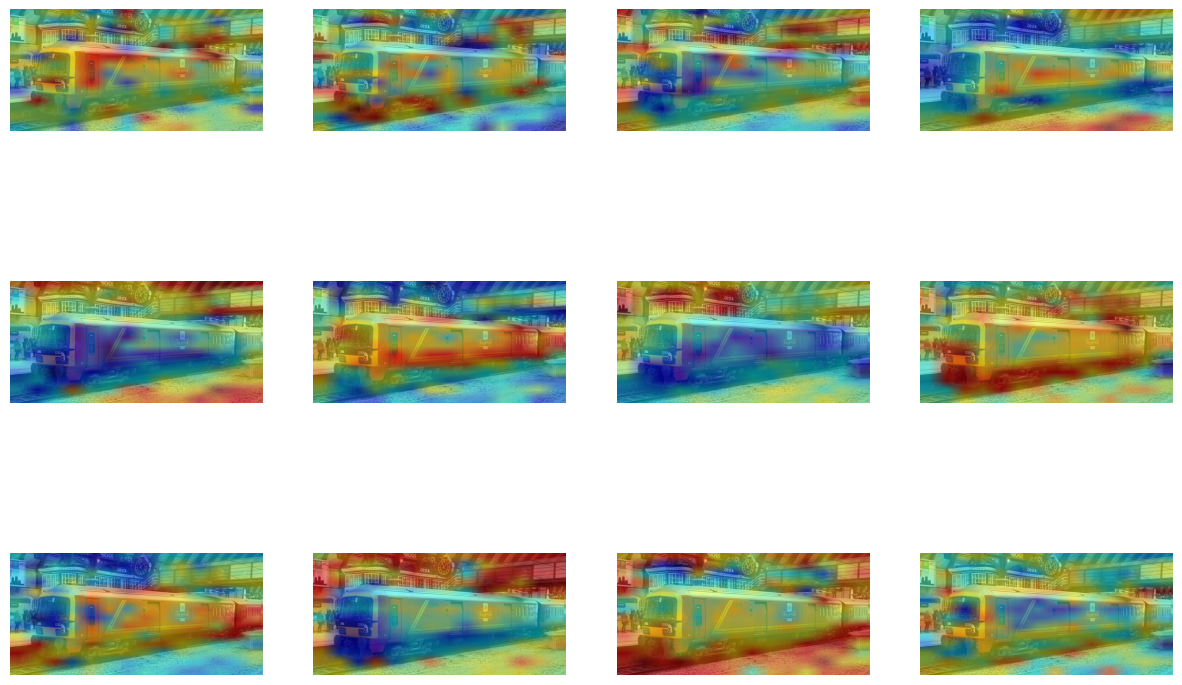

In [130]:
plot('/home/palm/data/coco/images/val2017/000000146825.jpg')

In [109]:
image_path = '/home/palm/data/coco/images/val2017/000000288882.jpg'
gen_text = image_to_text(image_path)[0]['generated_text']

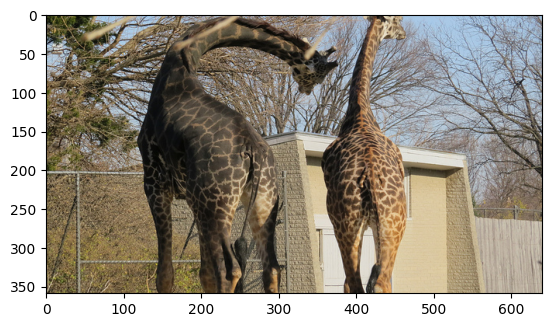

In [99]:
image = cv2.imread(image_path)
plt.imshow(image[..., ::-1])

'two giraffes standing next to each other near a building '

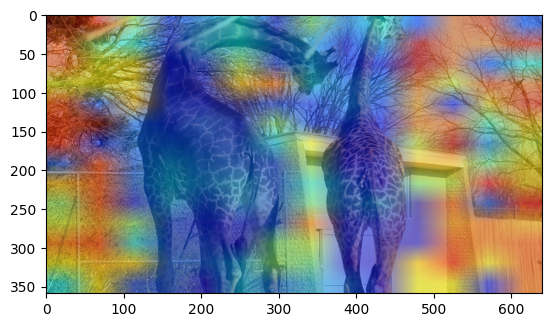

In [104]:
attn = image_to_text.hooks['attention_0'][0][0, 1:].sum(1).resize(14, 14).cpu().numpy()
heatmapshow = None
heatmapshow = cv2.normalize(attn, heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
super_imposed_img = cv2.addWeighted(cv2.resize(heatmapshow, (image.shape[1], image.shape[0])), 0.5, image, 0.5, 0)
plt.imshow(super_imposed_img[..., ::-1])
gen_text

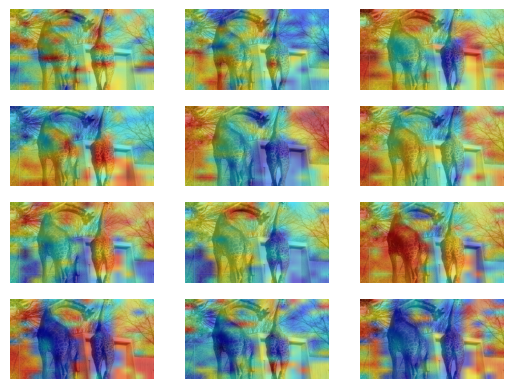

In [117]:
gen_text
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.axis('off')
    attn = image_to_text.hooks[f'attention_{i}'][0][0, 1:].sum(1).resize(14, 14).cpu().numpy()
    heatmapshow = None
    heatmapshow = cv2.normalize(attn, heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
    super_imposed_img = cv2.addWeighted(cv2.resize(heatmapshow, (image.shape[1], image.shape[0])), 0.5, image, 0.5, 0)
    plt.imshow(super_imposed_img[..., ::-1])
plt.show()
